## 测试可视化测井曲线以及解释层位的函数，并集中可视化


In [5]:
import os
import sys

import pandas as pd


In [6]:
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from visualize.well_log_plotter import plot_well_log

# ============ 测试配置 ============
# 数据路径
HORIZON_FILE = "../data/well_horizon_processed.xlsx"
# LAS_DIR = "../data/vertical_well_truncated_las"
LAS_DIR = "../data/vertical_well_las_delete_outliers_by_layers"

# 要绘制的曲线
CURVES = ["GR", "DT", "DEN", "POR", "CAL", "TWTPICKED"]

# 要处理的井
WELLS = ["PH1", "PH2", "PH3", "PH4", "PH5"]

测试 1: 带层位标注的绘图

--- 处理井: PH1 ---
✓ 成功读取 LAS 文件: ../data/vertical_well_las_delete_outliers_by_layers\PH1.las
  深度范围: 2092.30 - 3027.50 m
✓ 找到 33 个层位
⚠ 曲线 'TWTPICKED' 使用默认样式
✓ 将绘制的曲线: ['GR', 'DT', 'DEN', 'POR', 'CAL', 'TWTPICKED']
✓ 使用层位深度范围: 2122.29 - 2997.58 m
✓ 图像已保存到: output/test_with_horizons\PH1_well_log.png


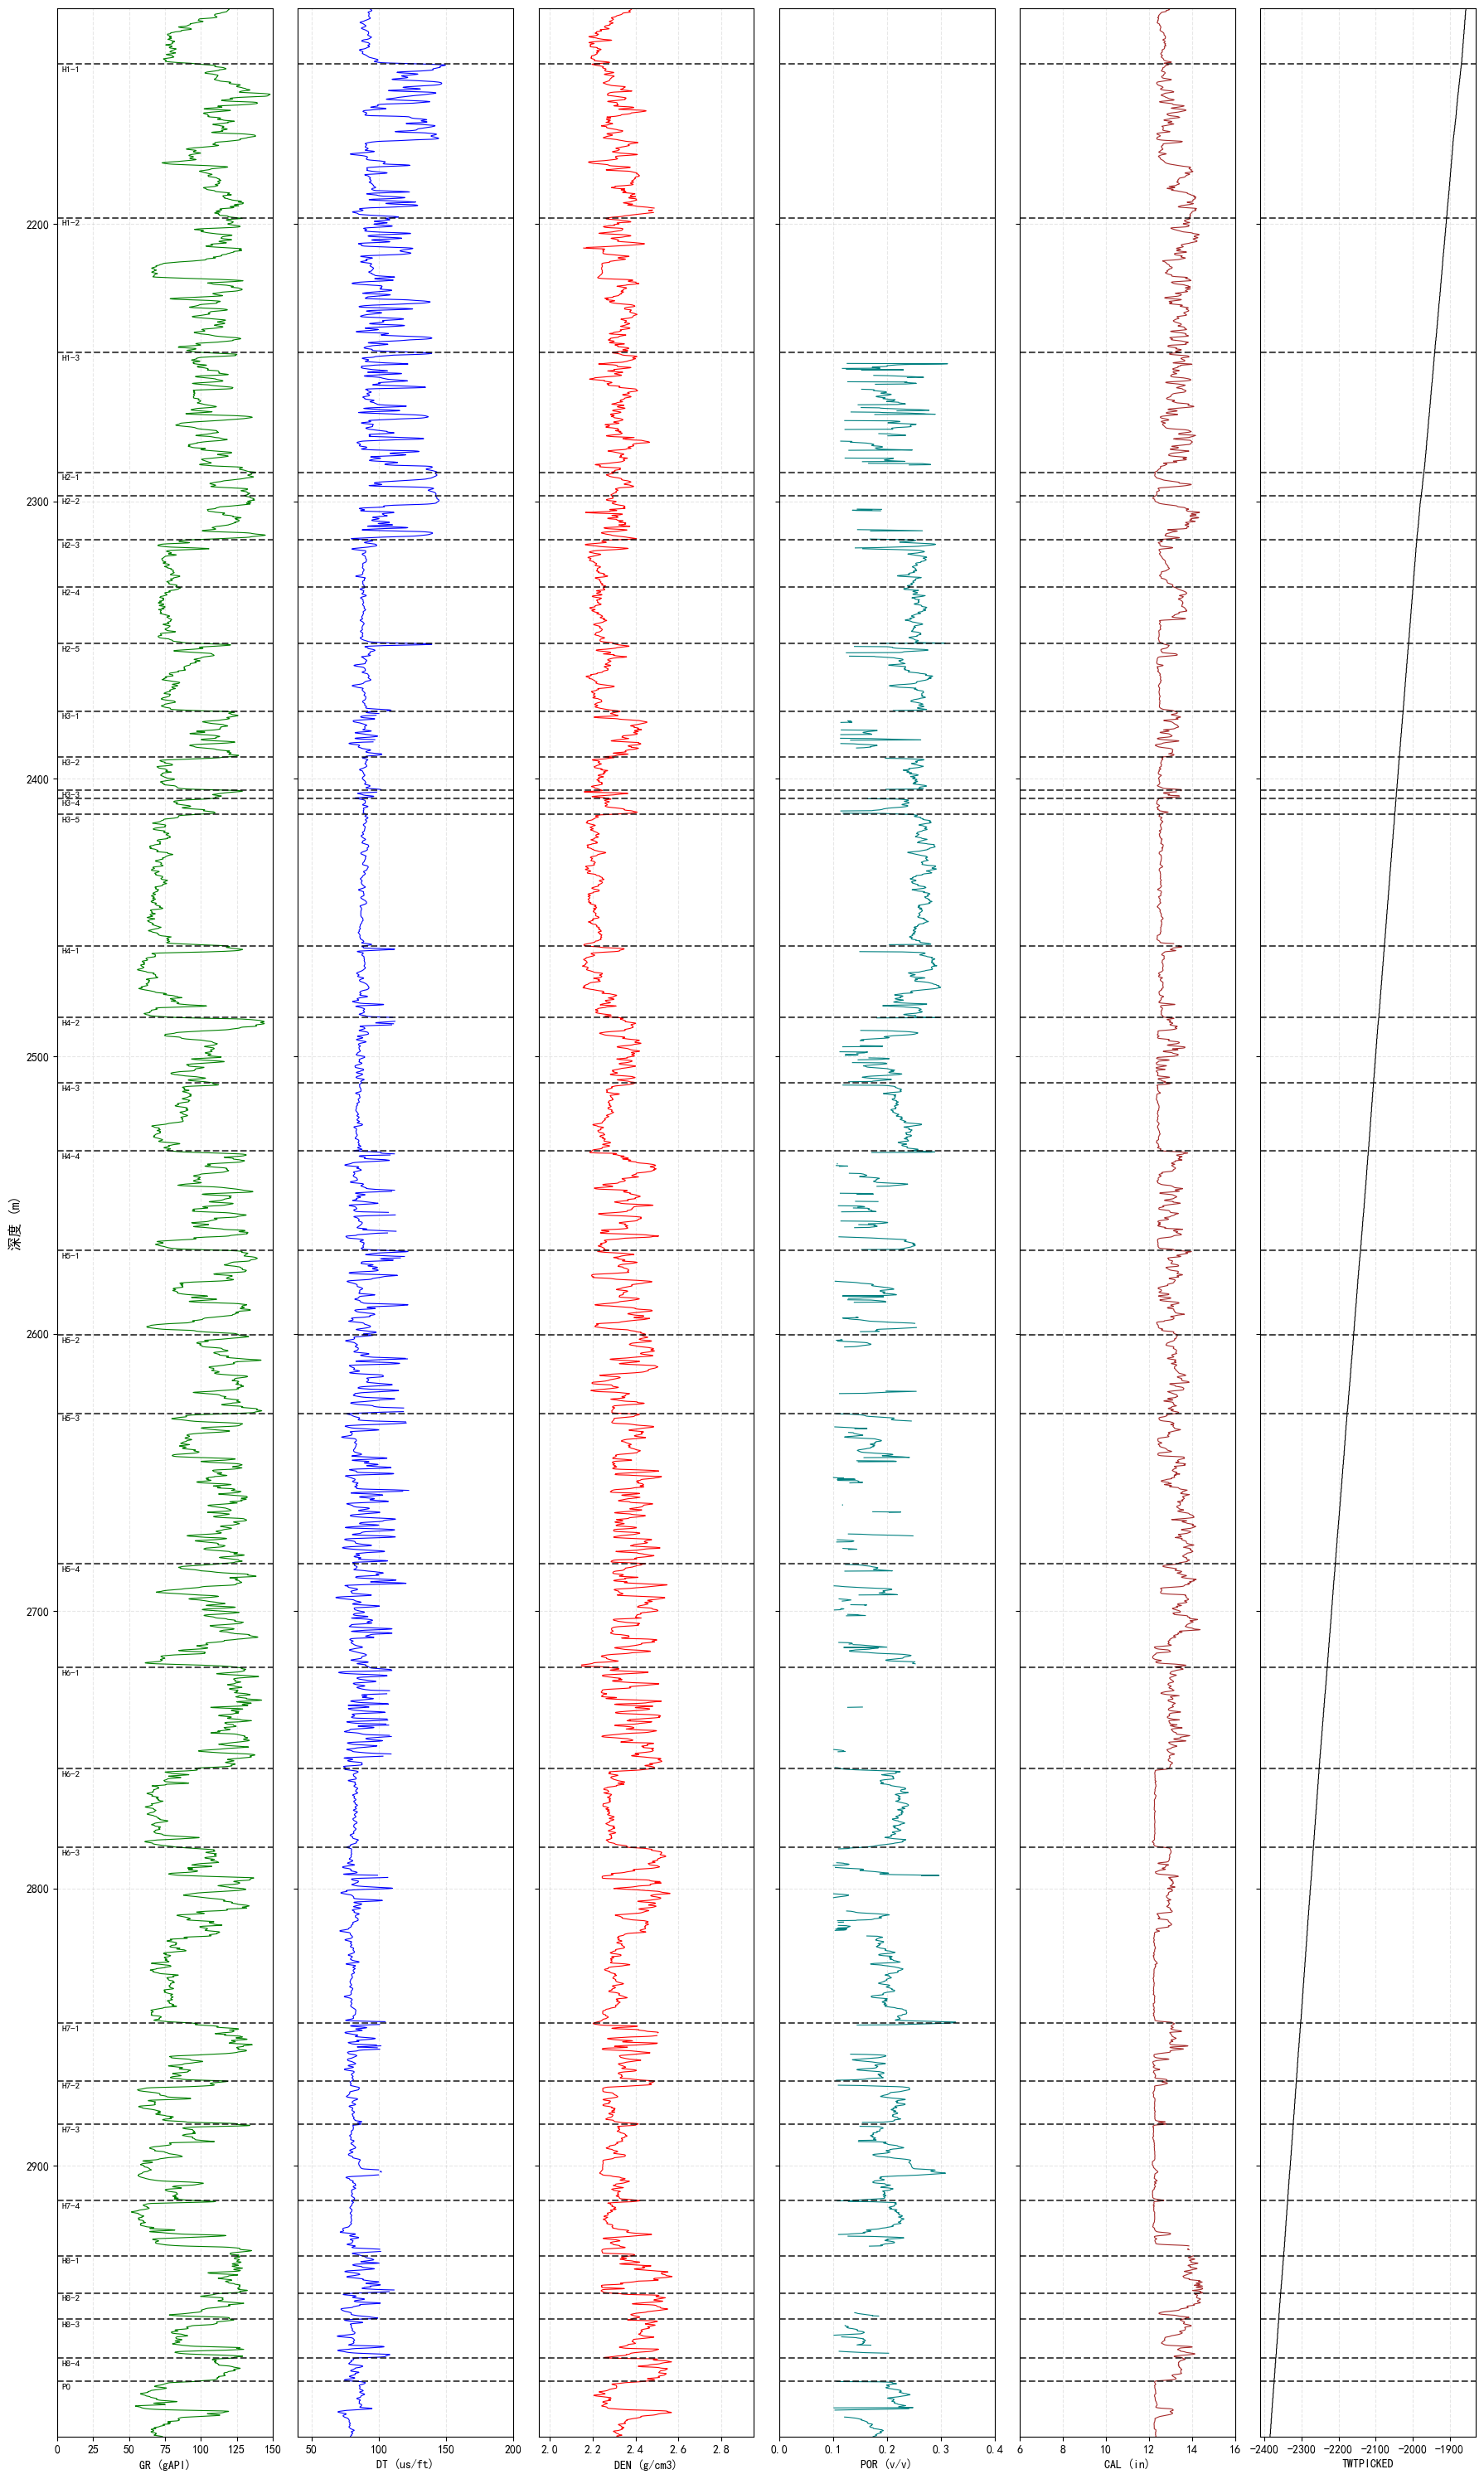


--- 处理井: PH2 ---
✓ 成功读取 LAS 文件: ../data/vertical_well_las_delete_outliers_by_layers\PH2.las
  深度范围: 2231.20 - 2968.00 m
✓ 找到 33 个层位
⚠ 曲线 'TWTPICKED' 使用默认样式
✓ 将绘制的曲线: ['GR', 'DT', 'DEN', 'POR', 'CAL', 'TWTPICKED']
✓ 使用层位深度范围: 2261.20 - 2938.09 m
✓ 图像已保存到: output/test_with_horizons\PH2_well_log.png


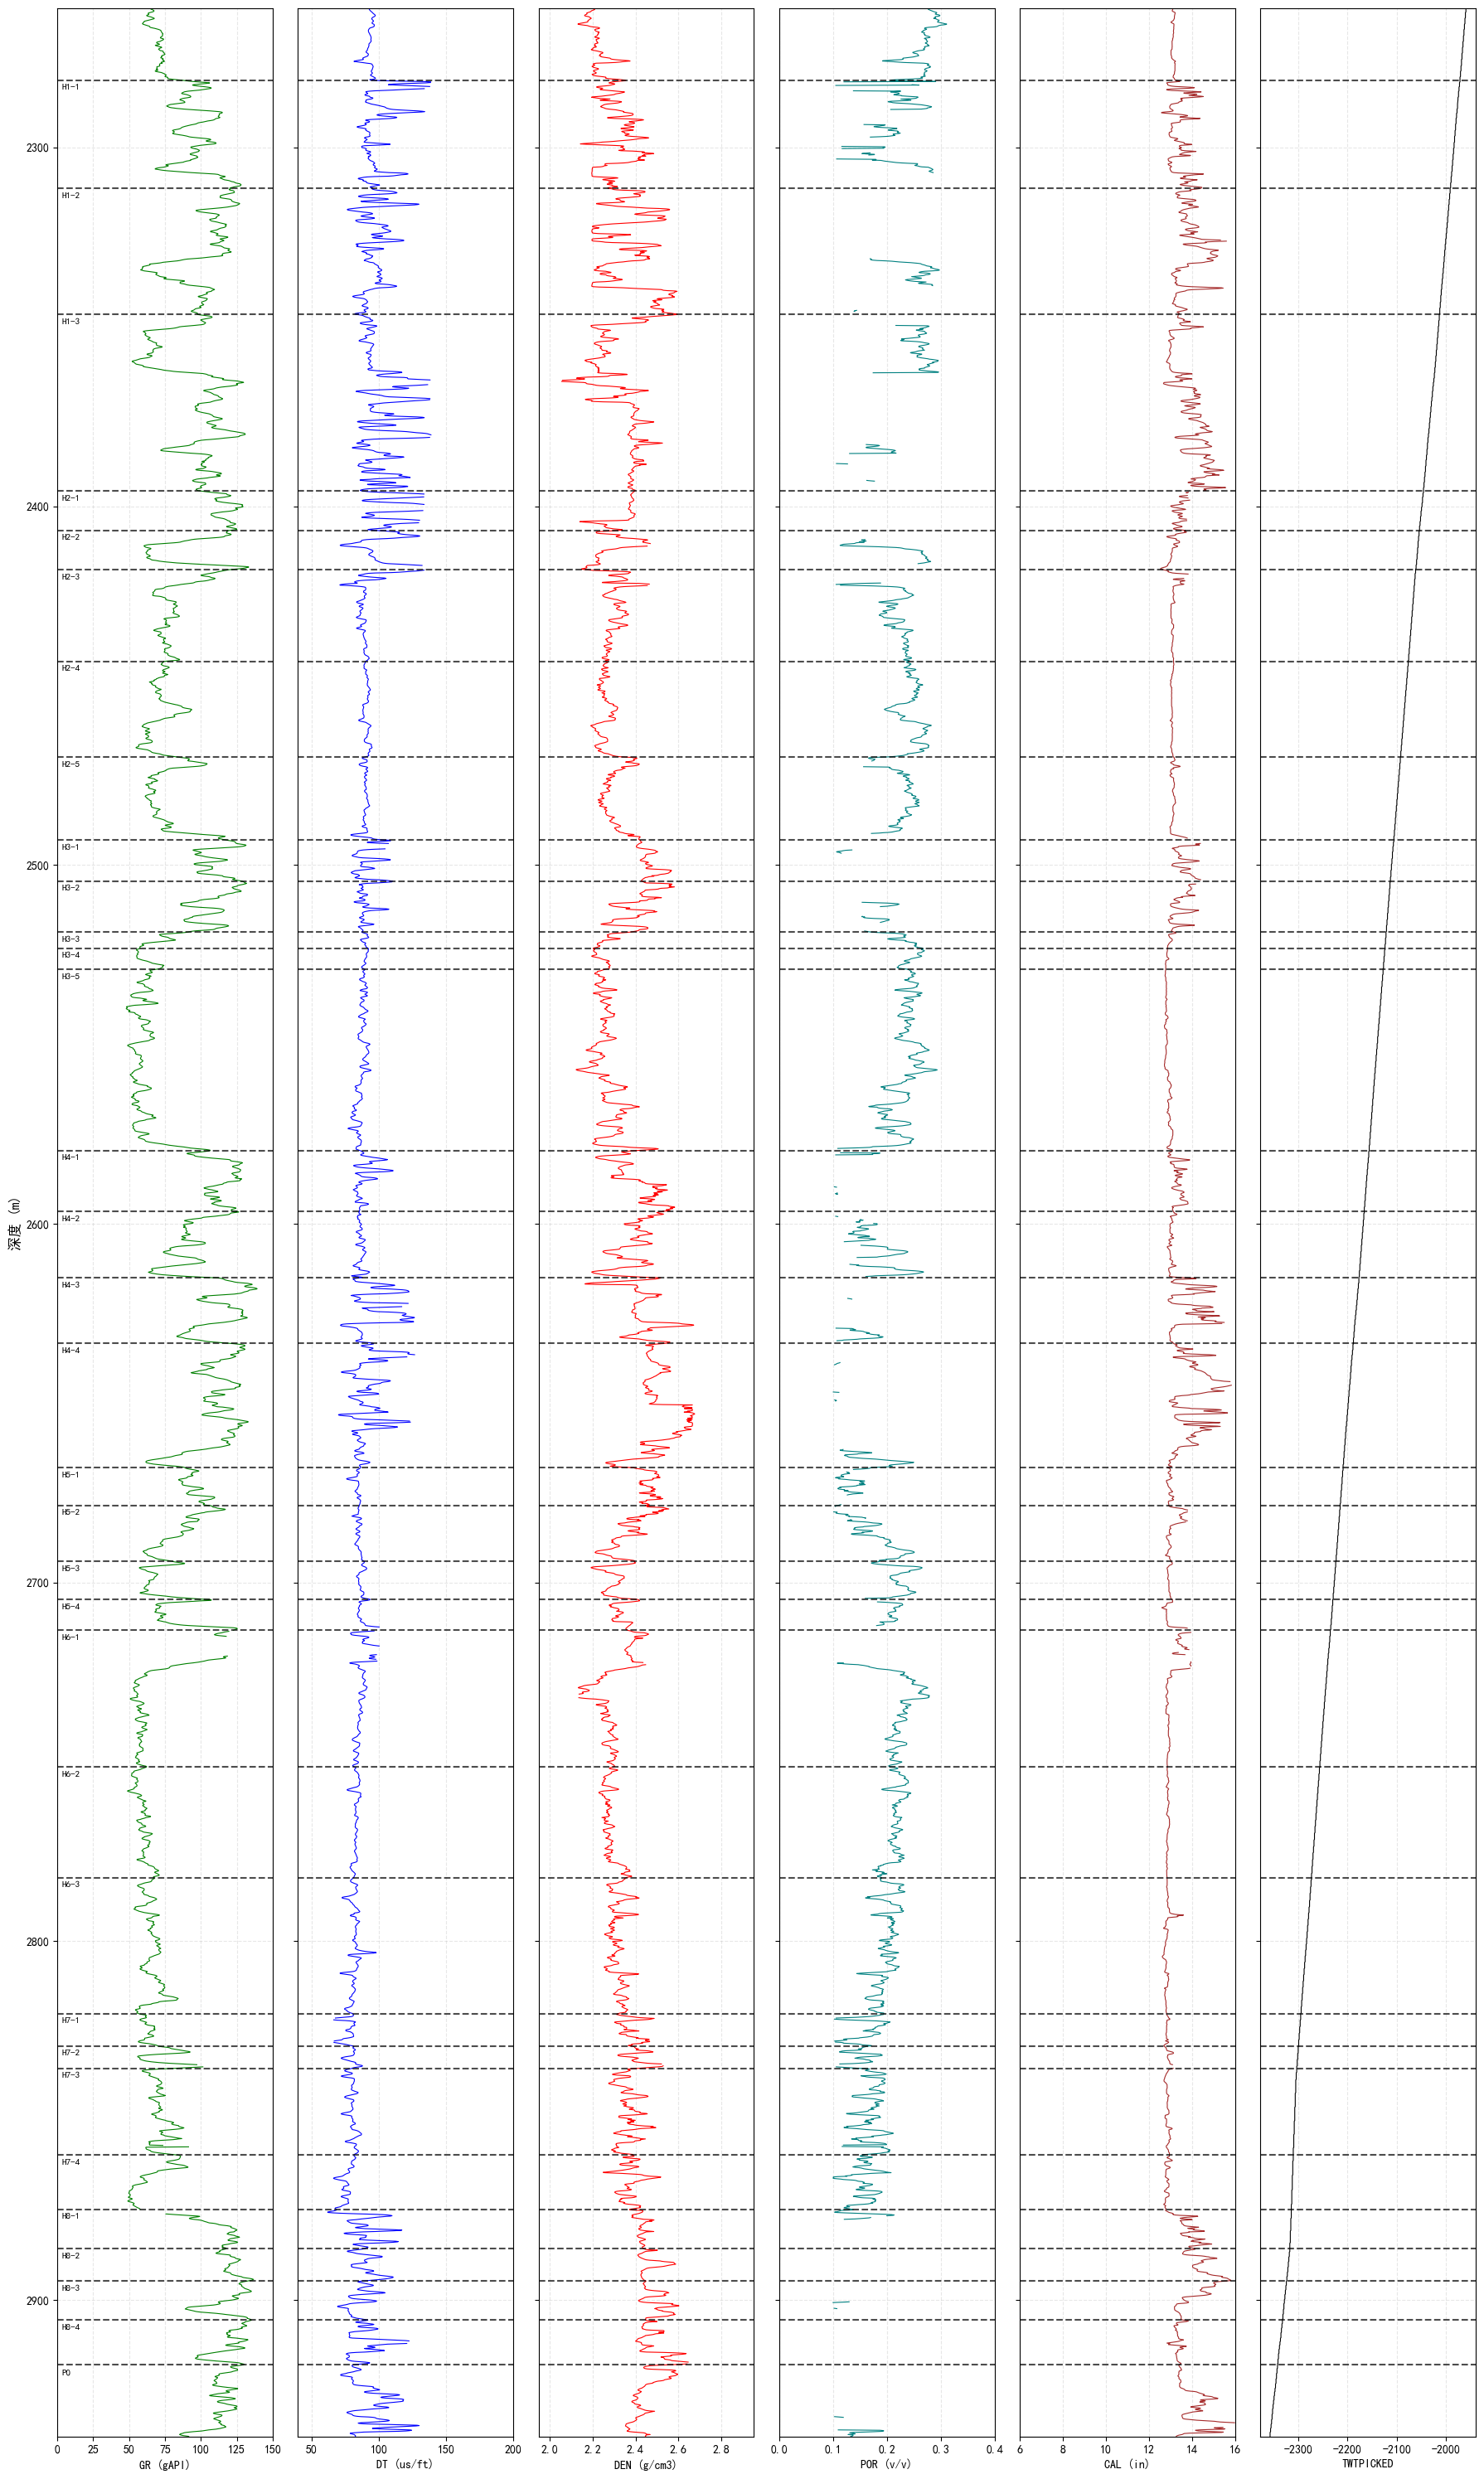


--- 处理井: PH3 ---
✓ 成功读取 LAS 文件: ../data/vertical_well_las_delete_outliers_by_layers\PH3.las
  深度范围: 2199.90 - 2865.10 m
✓ 找到 33 个层位
⚠ 曲线 'TWTPICKED' 使用默认样式
✓ 将绘制的曲线: ['GR', 'DT', 'DEN', 'POR', 'CAL', 'TWTPICKED']
✓ 使用层位深度范围: 2229.89 - 2835.18 m
✓ 图像已保存到: output/test_with_horizons\PH3_well_log.png


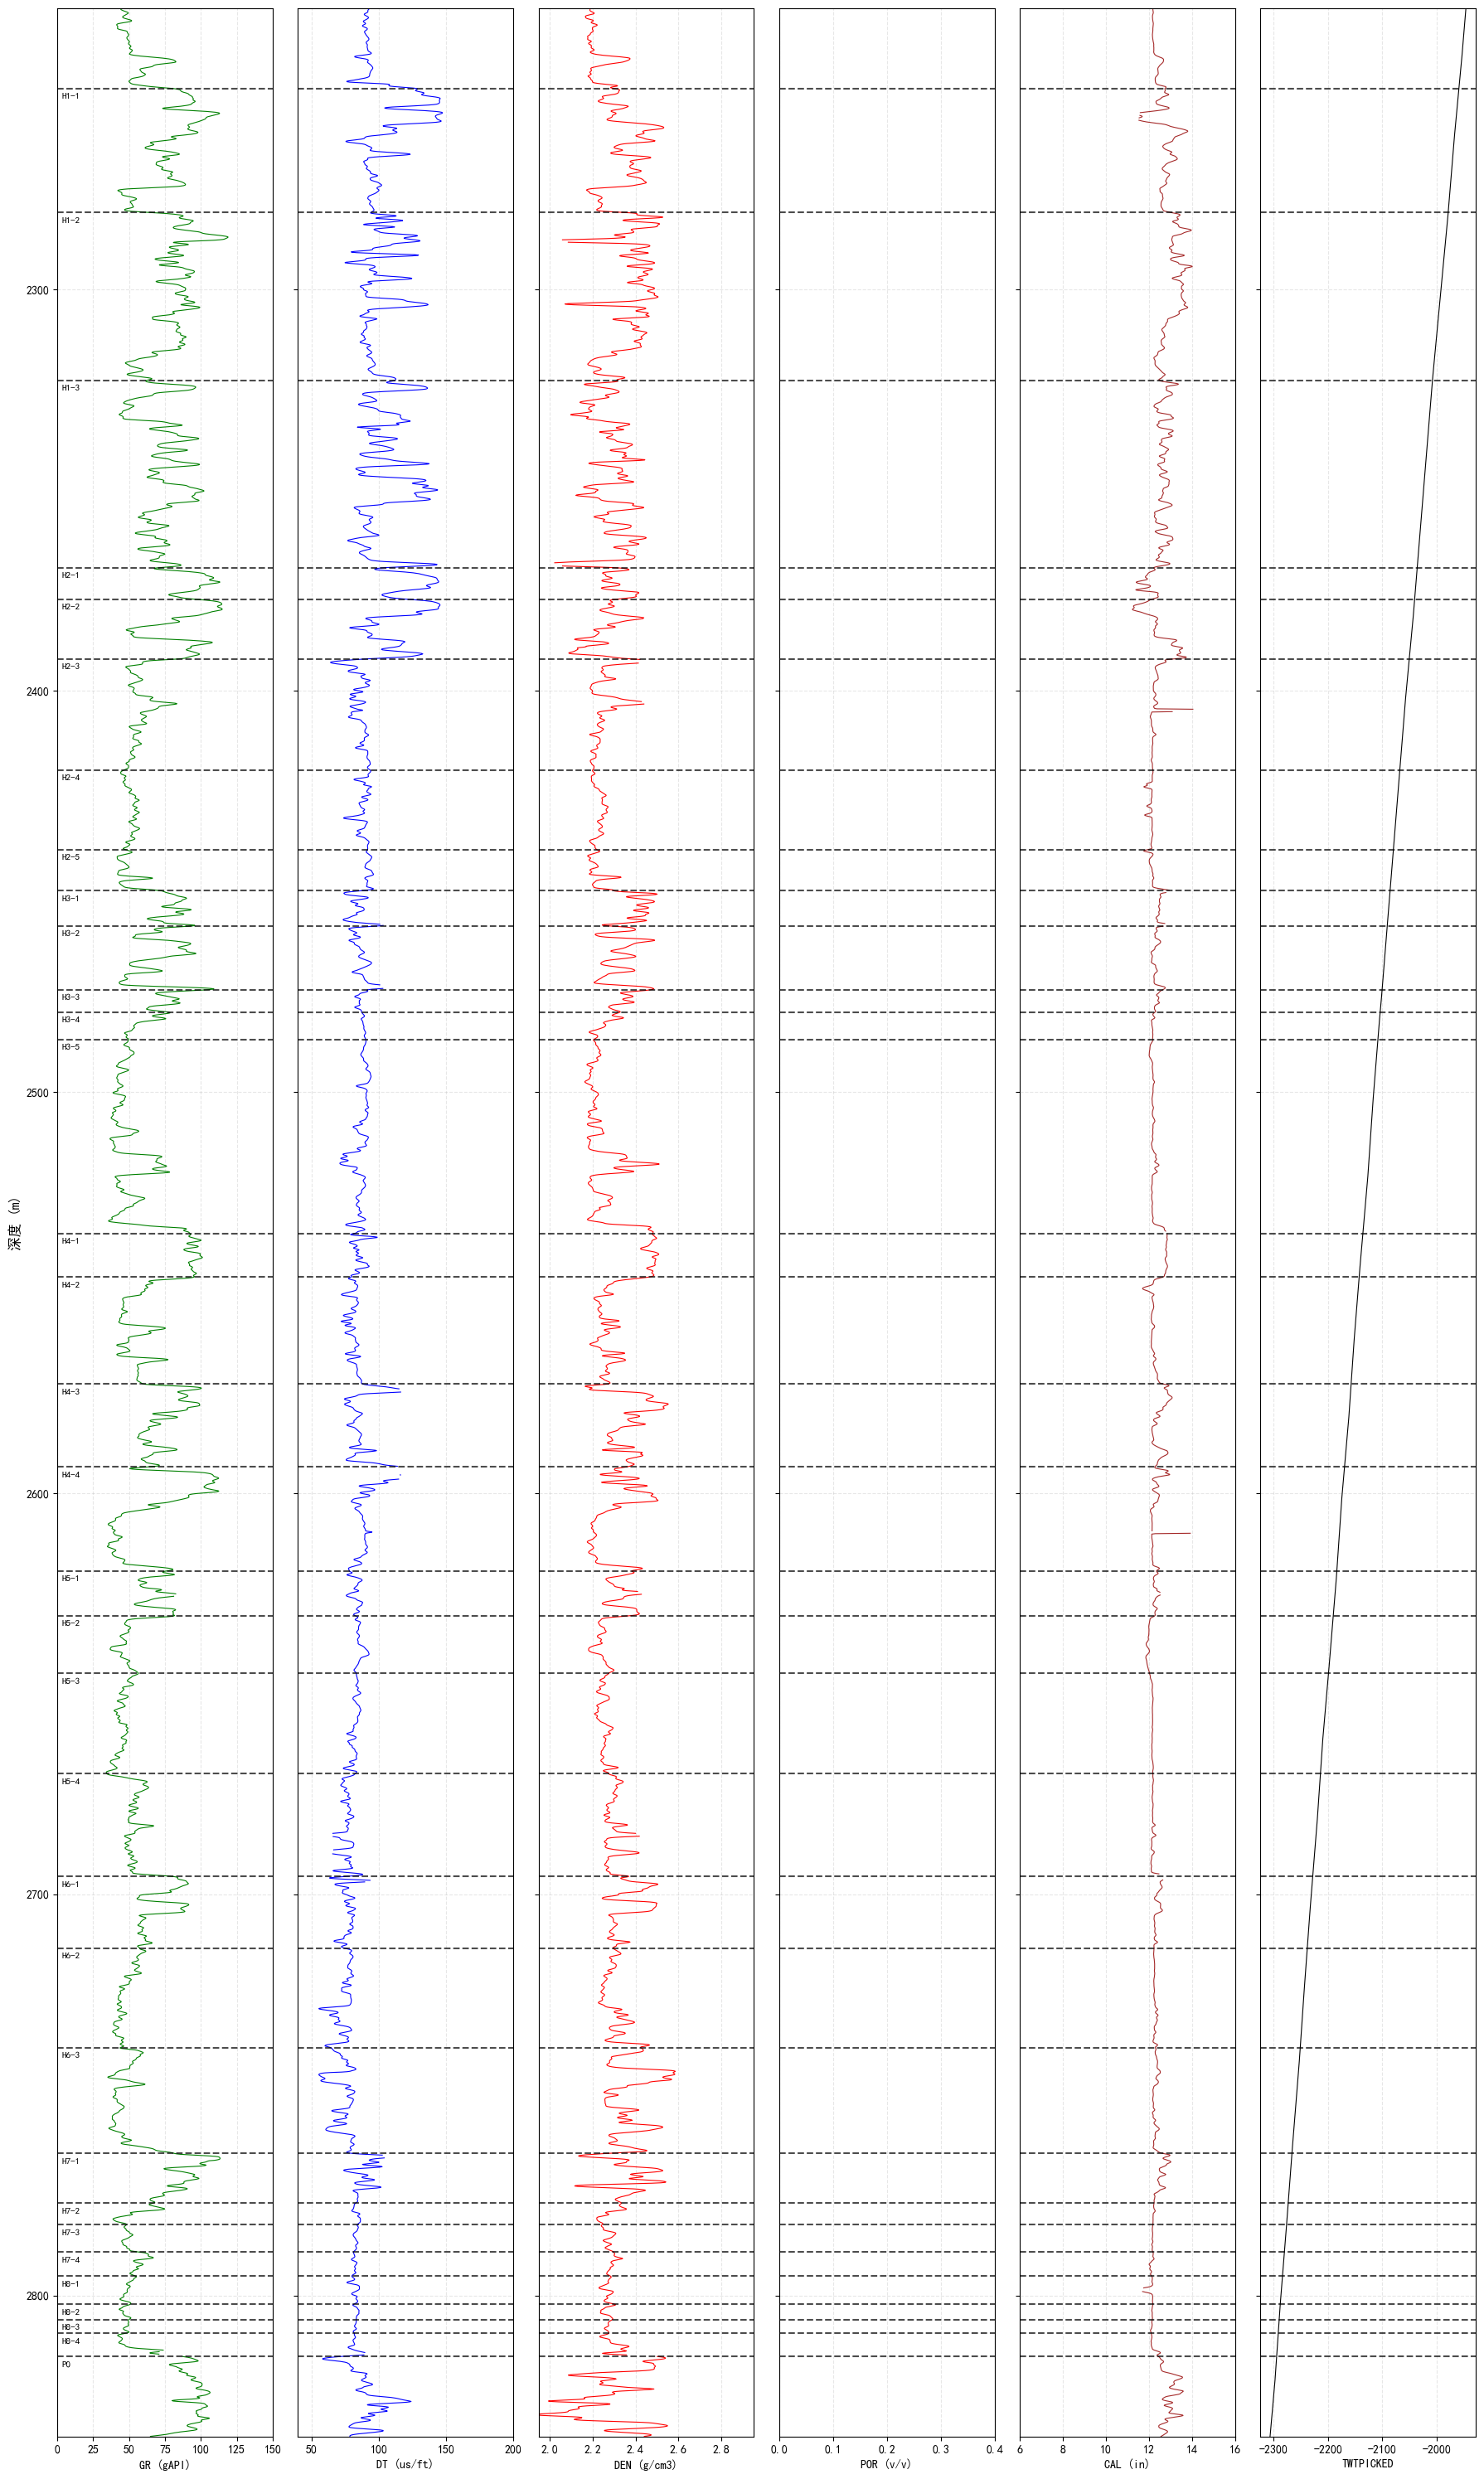


--- 处理井: PH4 ---
✓ 成功读取 LAS 文件: ../data/vertical_well_las_delete_outliers_by_layers\PH4.las
  深度范围: 2097.60 - 2940.00 m
✓ 找到 33 个层位
⚠ 曲线 'TWTPICKED' 使用默认样式
✓ 将绘制的曲线: ['GR', 'DT', 'DEN', 'POR', 'CAL', 'TWTPICKED']
✓ 使用层位深度范围: 2127.51 - 2910.09 m
✓ 图像已保存到: output/test_with_horizons\PH4_well_log.png


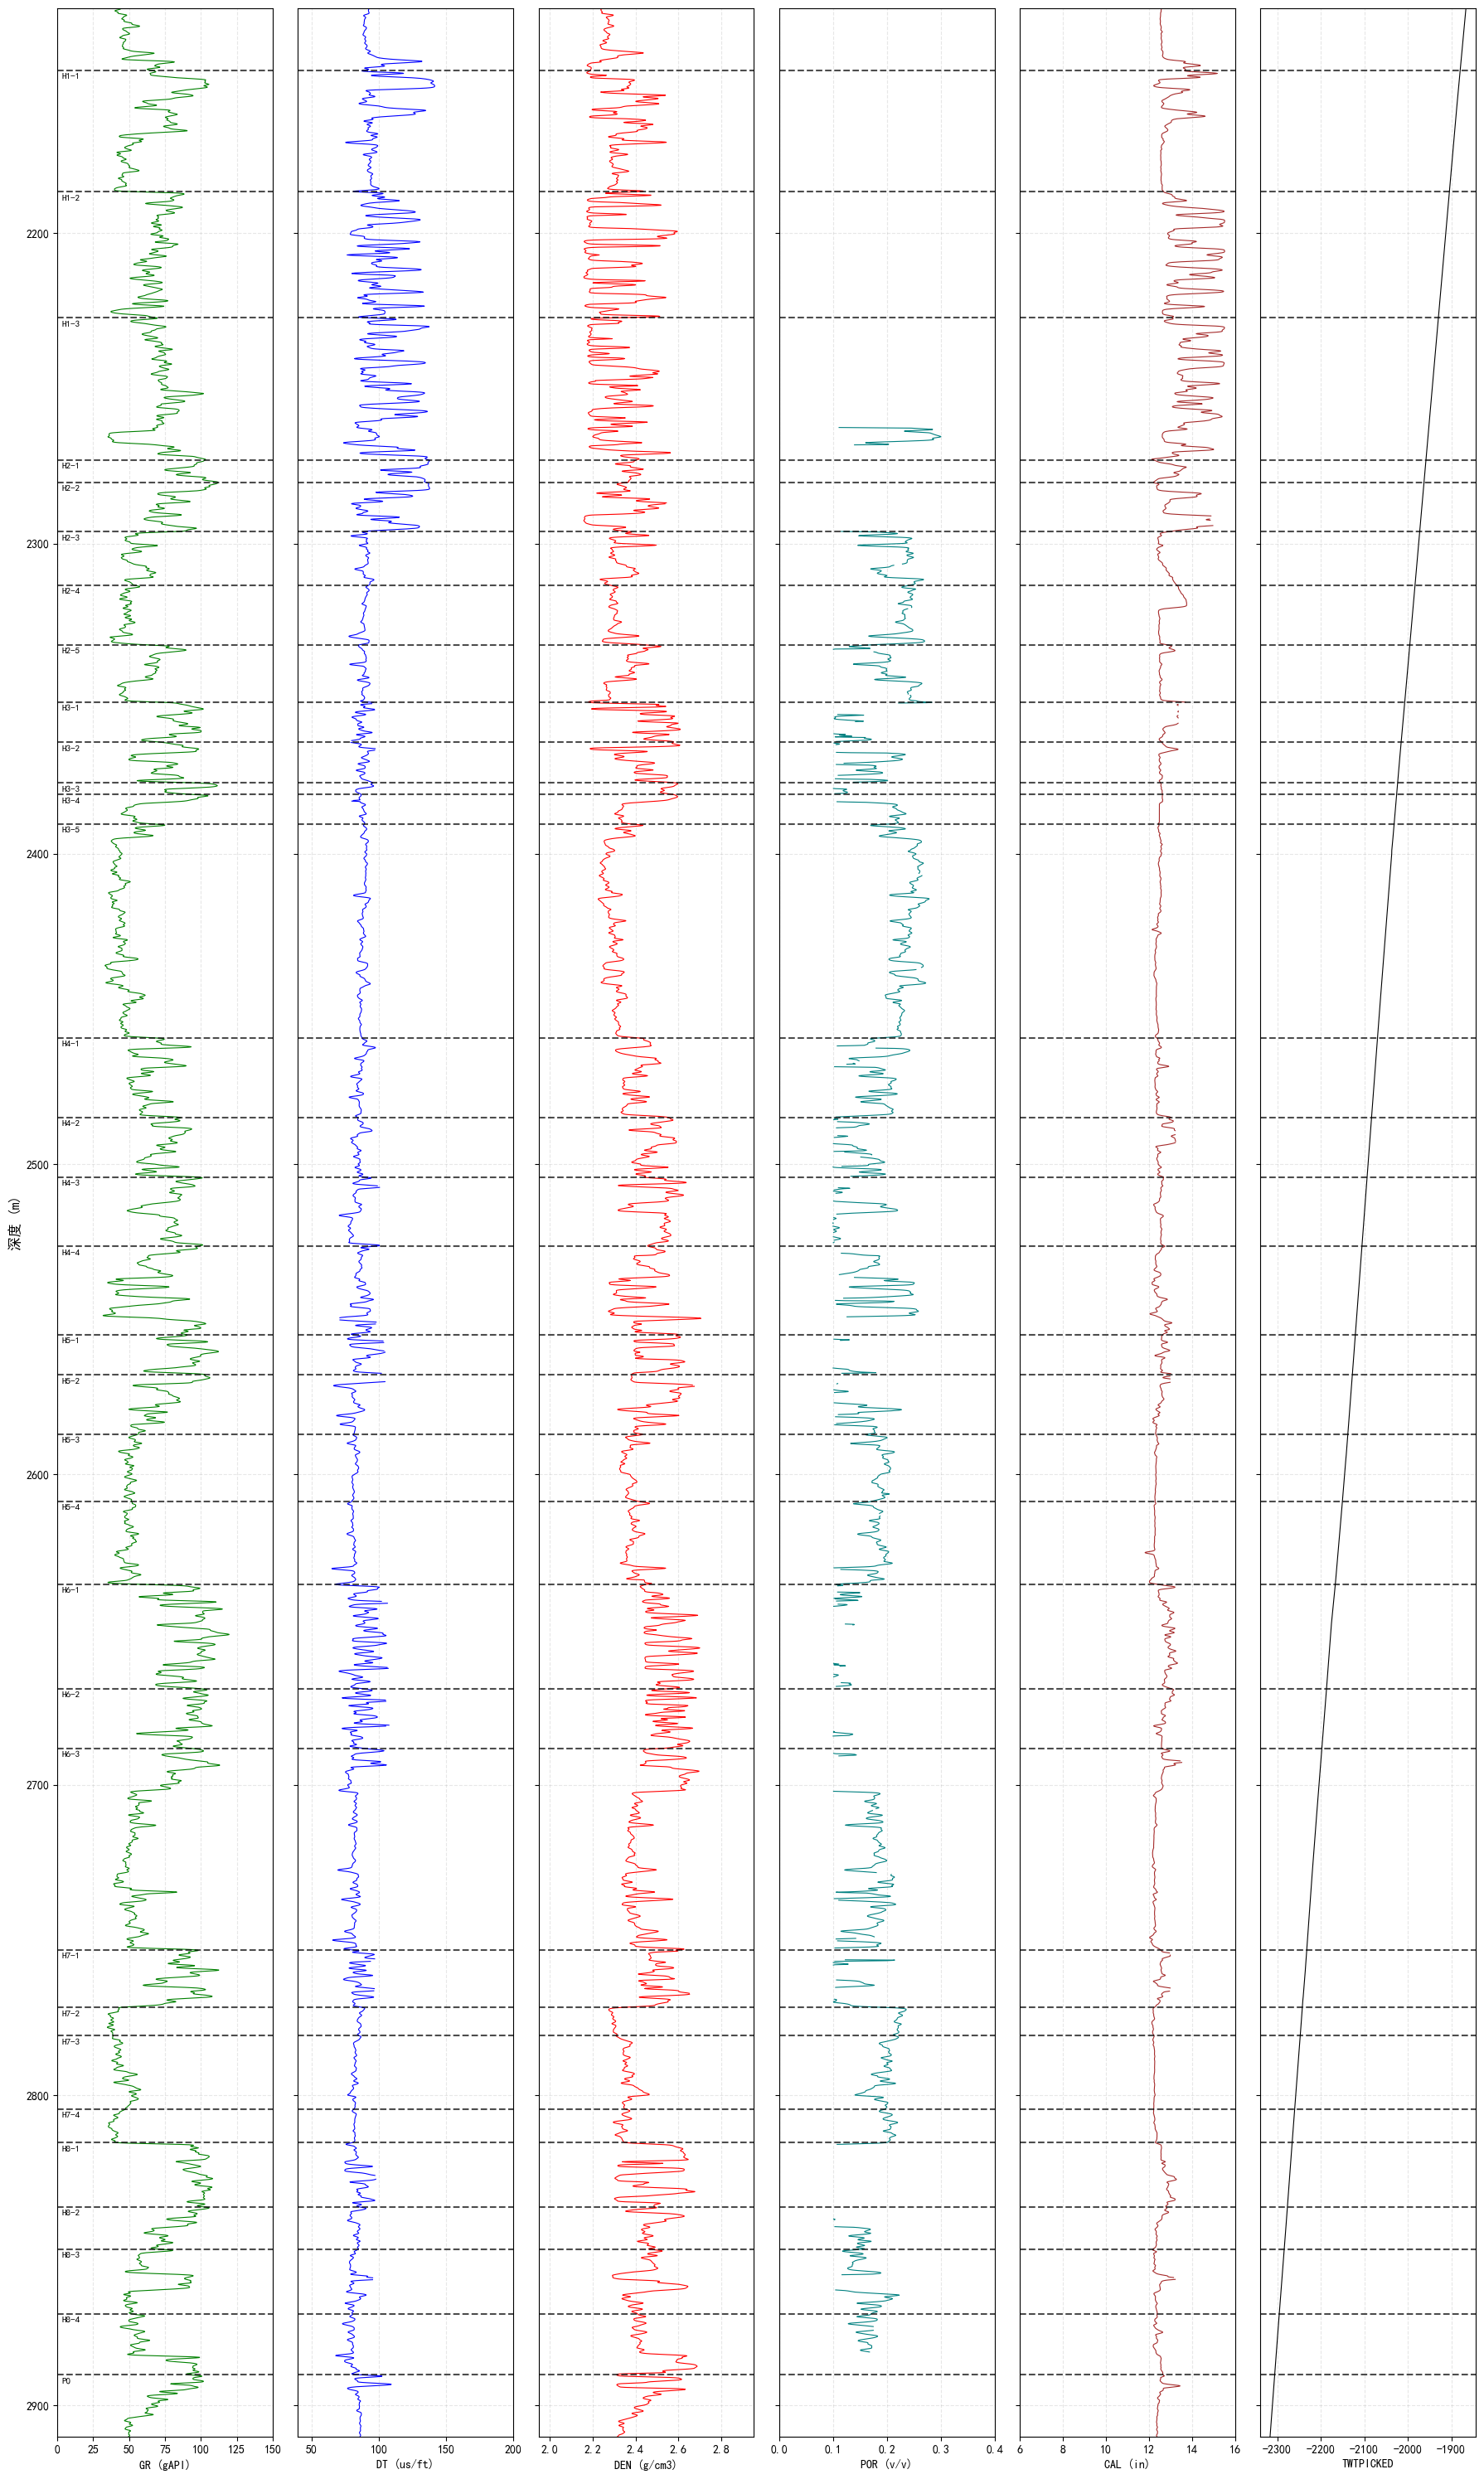


--- 处理井: PH5 ---
✓ 成功读取 LAS 文件: ../data/vertical_well_las_delete_outliers_by_layers\PH5.las
  深度范围: 2146.40 - 2942.20 m
✓ 找到 33 个层位
⚠ 曲线 'TWTPICKED' 使用默认样式
✓ 将绘制的曲线: ['GR', 'DT', 'DEN', 'POR', 'CAL', 'TWTPICKED']
✓ 使用层位深度范围: 2176.34 - 2912.26 m
✓ 图像已保存到: output/test_with_horizons\PH5_well_log.png


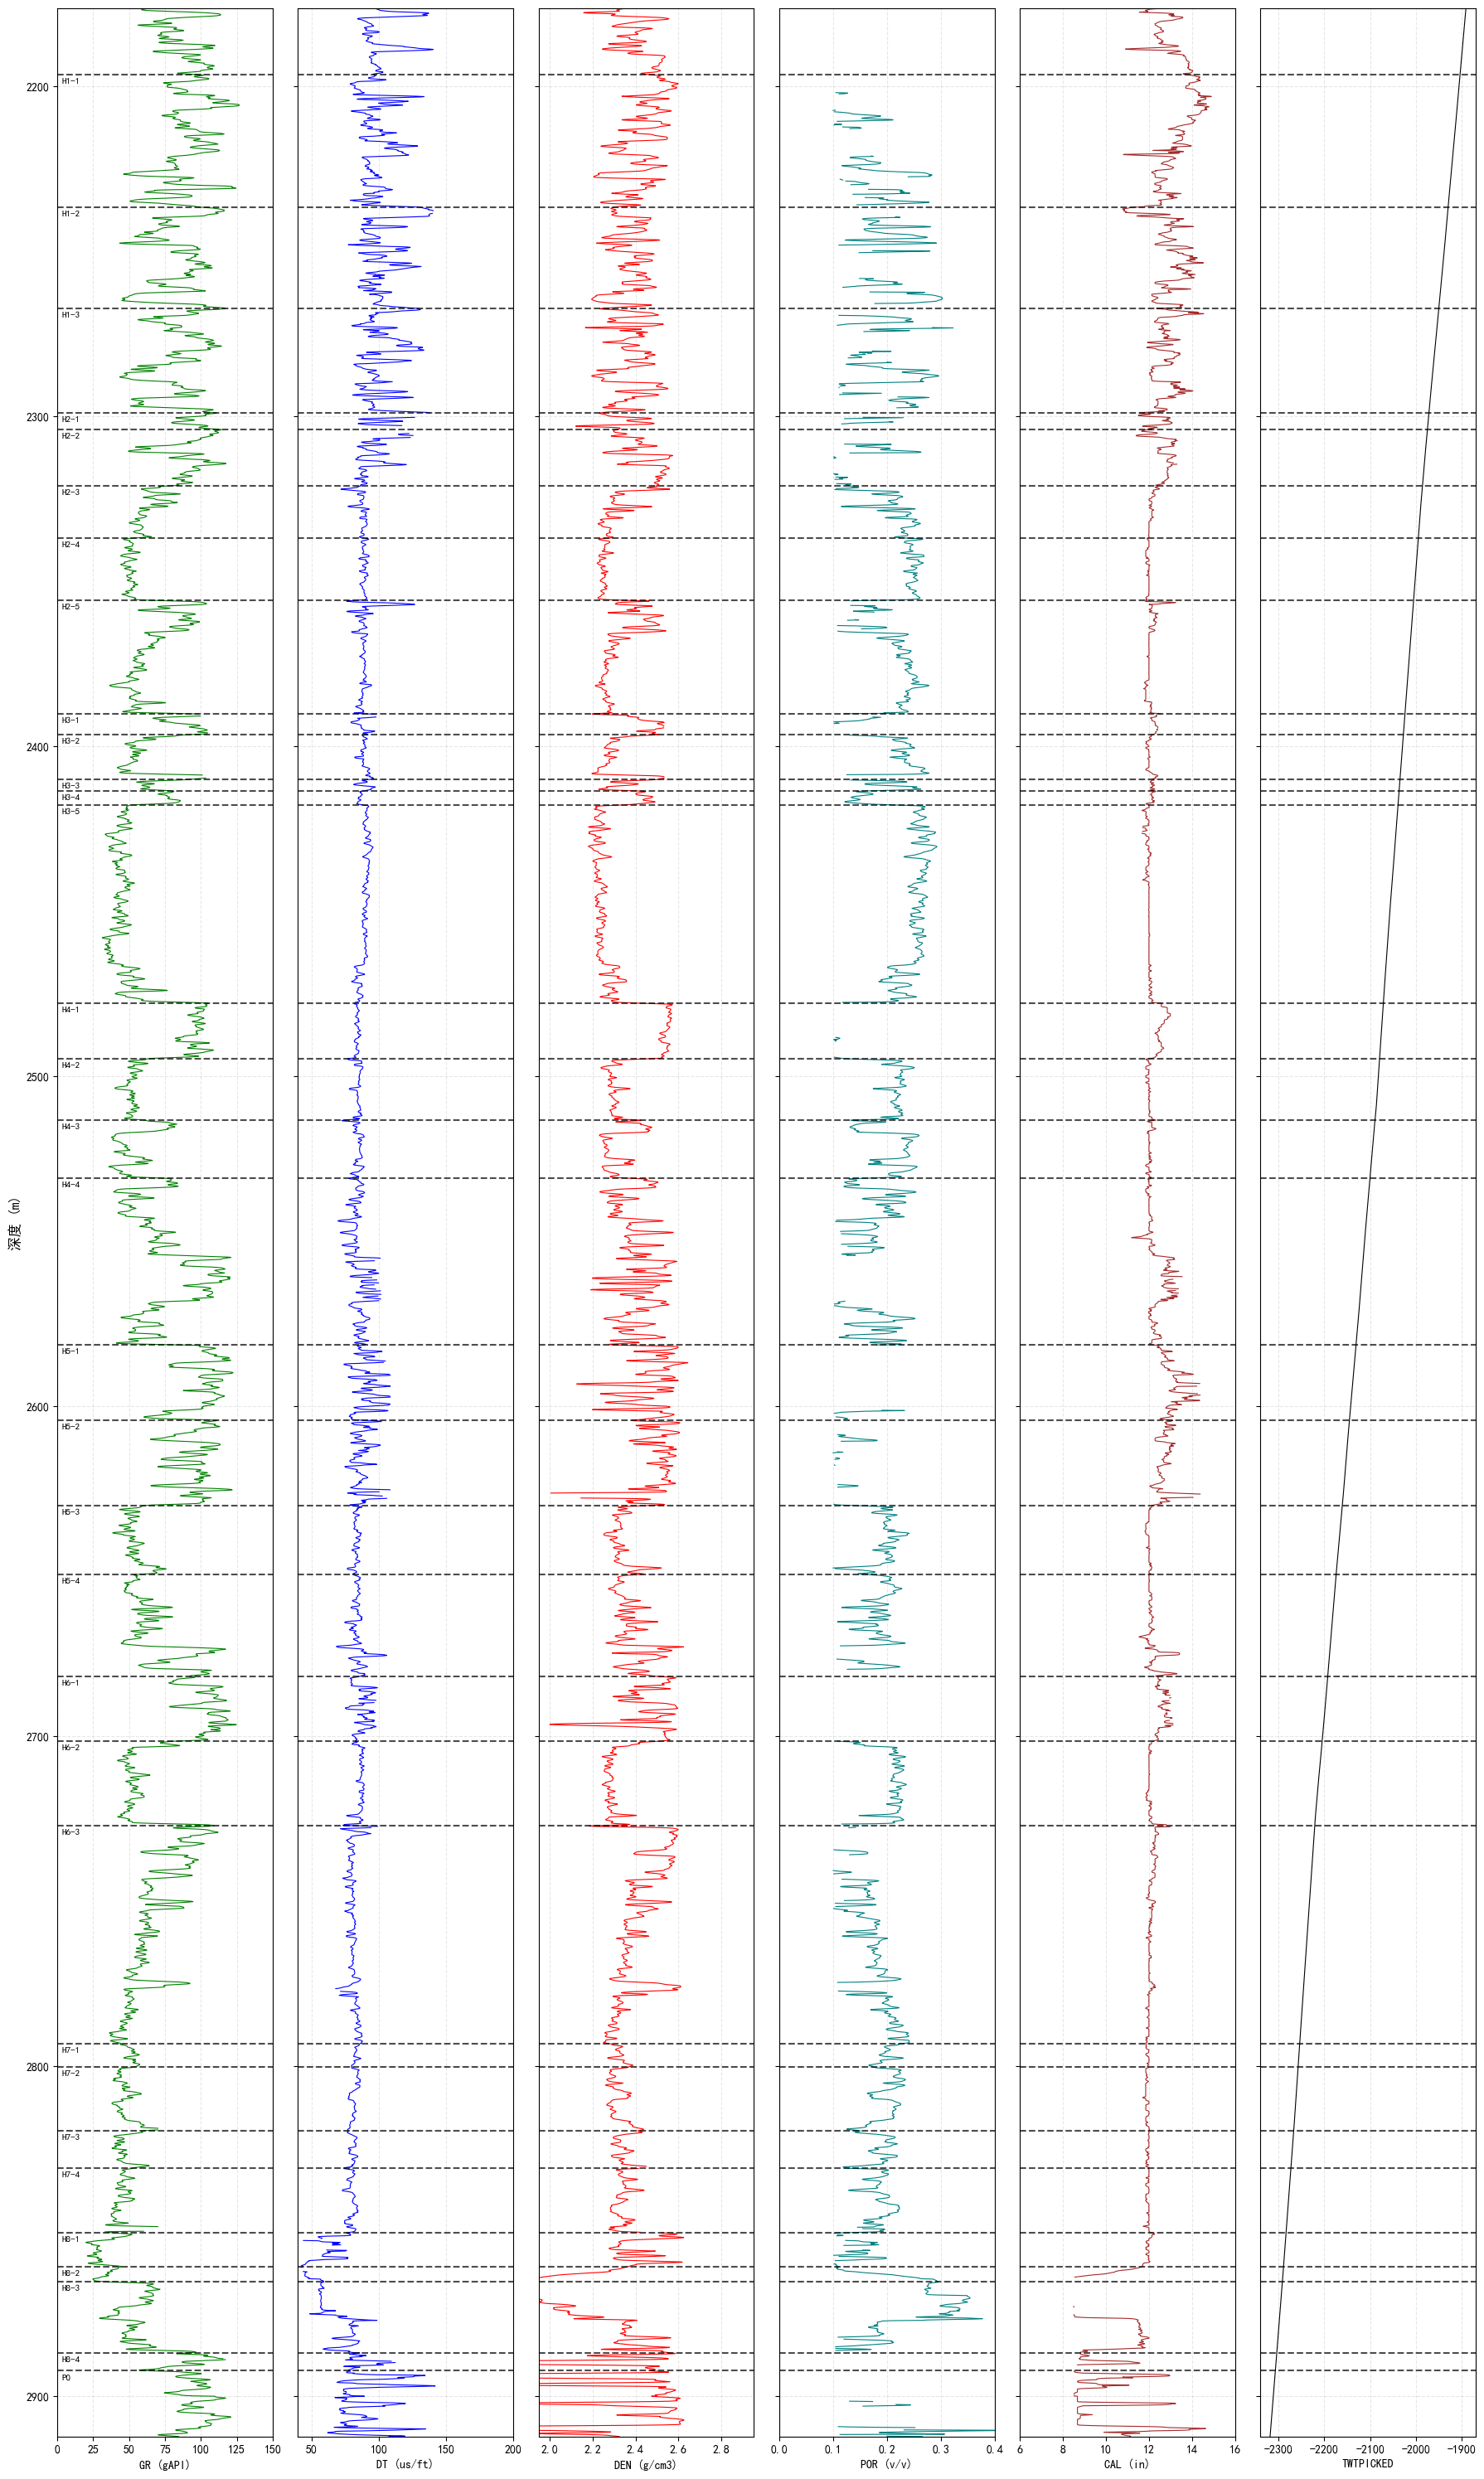


✓ 所有测试完成!


In [7]:
def test_with_horizons():
    """测试:带层位标注的绘图"""
    print("=" * 60)
    print("测试 1: 带层位标注的绘图")
    print("=" * 60)

    # 读取层位数据
    horizon_df = pd.read_excel(HORIZON_FILE)

    for well in WELLS:
        las_path = os.path.join(LAS_DIR, f"{well}.las")
        if os.path.exists(las_path):
            print(f"\n--- 处理井: {well} ---")
            plot_well_log(
                well_name=well,
                las_file_path=las_path,
                curves_to_plot=CURVES,
                horizon_df=horizon_df,
                output_dir="output/test_with_horizons",
                show_plot=True,
            )
        else:
            print(f"⚠ 文件不存在: {las_path}")


# def test_without_horizons():
#     """测试:不带层位的绘图"""
#     print("\n" + "=" * 60)
#     print("测试 2: 不带层位的绘图")
#     print("=" * 60)

#     well = "PH4"
#     las_path = os.path.join(LAS_DIR, f"{well}.las")

#     if os.path.exists(las_path):
#         print(f"\n--- 处理井: {well} (无层位) ---")
#         plot_well_log(
#             well_name=well,
#             las_file_path=las_path,
#             curves_to_plot=["GR", "DT", "DEN"],
#             horizon_df=None,  # 不提供层位数据
#             output_dir="output/test_without_horizons",
#             show_plot=True,
#         )
#     else:
#         print(f"⚠ 文件不存在: {las_path}")


# def test_custom_parameters():
#     """测试:自定义参数"""
#     print("\n" + "=" * 60)
#     print("测试 3: 自定义参数")
#     print("=" * 60)

#     horizon_df = pd.read_excel(HORIZON_FILE)
#     well = "PH4"
#     las_path = os.path.join(LAS_DIR, f"{well}.las")

#     if os.path.exists(las_path):
#         print(f"\n--- 处理井: {well} (自定义参数) ---")
#         plot_well_log(
#             well_name=well,
#             las_file_path=las_path,
#             curves_to_plot=["GR", "DT"],
#             horizon_df=horizon_df,
#             output_dir="output/test_custom",
#             depth_padding=20,  # 更大的深度边距
#             fig_height=20,  # 更小的图像高度
#             track_width=4,  # 更宽的道
#             show_plot=True,
#         )
#     else:
#         print(f"⚠ 文件不存在: {las_path}")


if __name__ == "__main__":
    # 运行所有测试
    test_with_horizons()
    # test_without_horizons()
    # test_custom_parameters()

    print("\n" + "=" * 60)
    print("✓ 所有测试完成!")
    print("=" * 60)